In [1]:
!pip install pycaret
!pip install kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 602.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [7]:
from google.colab import files
files.upload()  # Upload kaggle.json here

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# Download the Student Performance dataset from Kaggle
!kaggle datasets download -d uciml/student-alcohol-consumption

# Unzip the downloaded file
!unzip student-alcohol-consumption.zip


Dataset URL: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
License(s): CC0-1.0
  0% 0.00/18.4k [00:00<?, ?B/s]
100% 18.4k/18.4k [00:00<00:00, 27.0MB/s]
Archive:  student-alcohol-consumption.zip
  inflating: student-mat.csv         
  inflating: student-merge.R         
  inflating: student-por.csv         


In [10]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('student-mat.csv')  # Check the file name after unzipping
data.head()  # Verify the data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'G3', session_id = 42)

,Description,Value
0,Session id,42
1,Target,G3
2,Target type,Regression
3,Original data shape,"(395, 33)"
4,Transformed data shape,"(395, 46)"
5,Transformed train set shape,"(276, 46)"
6,Transformed test set shape,"(119, 46)"
7,Numeric features,15
8,Categorical features,17
9,Preprocess,True


In [12]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [13]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [14]:
# init setup on exp
exp.setup(data, target = 'G3', session_id = 42)

,Description,Value
0,Session id,42
1,Target,G3
2,Target type,Regression
3,Original data shape,"(395, 33)"
4,Transformed data shape,"(395, 46)"
5,Transformed train set shape,"(276, 46)"
6,Transformed test set shape,"(119, 46)"
7,Numeric features,15
8,Categorical features,17
9,Preprocess,True


In [15]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.0518,2.2657,1.4717,0.8863,0.4069,0.0855,0.3730
xgboost,Extreme Gradient Boosting,0.9615,2.2691,1.4676,0.8830,0.2953,0.0897,0.2820
rf,Random Forest Regressor,0.9738,2.2828,1.4814,0.8825,0.3499,0.0856,0.4590
gbr,Gradient Boosting Regressor,1.0233,2.3511,1.5065,0.8777,0.3590,0.0911,0.4470
lightgbm,Light Gradient Boosting Machine,1.1350,2.6246,1.5863,0.8635,0.3615,0.0997,0.3060
knn,K Neighbors Regressor,1.2448,3.1272,1.7348,0.8468,0.3778,0.1133,0.2250
et,Extra Trees Regressor,1.1121,2.9463,1.6851,0.8460,0.4074,0.0923,0.4090
br,Bayesian Ridge,1.2079,3.2943,1.7962,0.8324,0.4734,0.0903,0.2000
omp,Orthogonal Matching Pursuit,1.1553,3.4170,1.8264,0.8261,0.4877,0.0815,0.3120
en,Elastic Net,1.1023,3.5096,1.8512,0.8222,0.4891,0.0741,0.2010


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

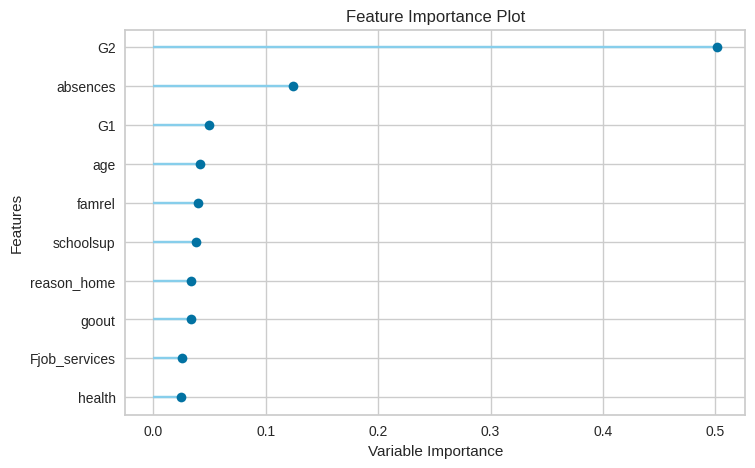

In [17]:
# plot feature importance
plot_model(best, plot = 'feature')

In [18]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.1748,3.5269,1.8780,0.8396,0.4794,0.0974


In [21]:
# show predictions df
# copy data and drop charges

new_data = data.copy()
new_data.drop('G3', axis=1, inplace=True)
new_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [25]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,prediction_label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6.066667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,5.870370
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,8.880597
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,13.600000
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,9.750000


In [23]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'Medu', 'Fedu',
                                              'traveltime', 'studytime',
                                              'failures', 'famrel', 'freetime',
                                              'goout', 'Dalc', 'Walc', 'health',
                                              'absences', 'G1', 'G2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['school', 'sex', 'address',
                                              'famsize', 'Pstatus', '...
 NaN   -1
 dtype: int64},
                                                                         {'col': 'romantic',
                                                                          'data_type': dtype('O'),
                                                                         

In [24]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'Medu', 'Fedu',
                                             'traveltime', 'studytime',
                                             'failures', 'famrel', 'freetime',
                                             'goout', 'Dalc', 'Walc', 'health',
                                             'absences', 'G1', 'G2'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['school', 'sex', 'address',
                                             'famsize',...
NaN   -1
dtype: int64},
                                                                        {'col': 'romantic',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Mjob', 'Fjob', 'reason',
                                             'guardian'],
                                    transformer=OneHotEncoder(cols=['Mjob',
                                                                    'Fjob',
                                                                    'reason',
                                                                    'guardian'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', AdaBoostRegressor(random_state=42))])